In [12]:
import tensorflow.keras as keras
import tensorflow as tf

In [13]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [14]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

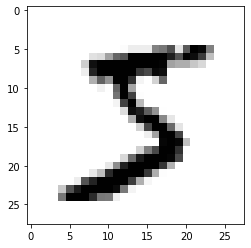

5


In [22]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])

In [23]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

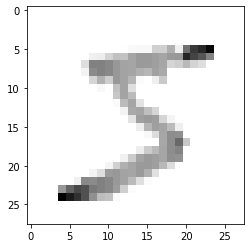

In [25]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [26]:
model = tf.keras.models.Sequential()

In [27]:
model.add(tf.keras.layers.Flatten())


In [28]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [29]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [30]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2580 - accuracy: 0.9243
Epoch 2/3
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1073 - accuracy: 0.9668
Epoch 3/3
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0723 - accuracy: 0.9768


In [33]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10227808984955773
0.9688


In [34]:
model.save('num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_reader.model/assets


In [35]:
new_model = tf.keras.models.load_model('num_reader.model')

In [36]:
predictions = new_model.predict(x_test)

In [37]:
print(predictions)

[[5.0211821e-09 5.9444960e-09 7.3936976e-06 ... 9.9991190e-01
  1.4640958e-07 2.5413908e-07]
 [1.6293923e-08 1.5490428e-05 9.9998331e-01 ... 1.0239604e-12
  6.4032730e-09 1.0798853e-12]
 [3.5813173e-08 9.9987876e-01 4.1874714e-06 ... 7.4266804e-06
  6.2145482e-05 4.5384145e-06]
 ...
 [2.9721525e-10 9.5543335e-08 4.9789590e-09 ... 5.9399281e-06
  6.0266880e-06 2.1677956e-06]
 [8.3542076e-08 2.8430986e-07 7.9897696e-08 ... 2.2897942e-07
  1.0344503e-03 8.5070617e-08]
 [1.8320877e-06 9.7815715e-08 1.3515618e-06 ... 1.9537691e-10
  1.0522380e-06 1.3725949e-09]]


In [40]:
import numpy as np

print(np.argmax(predictions[6]))

4


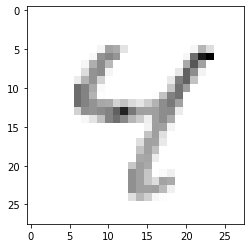

In [41]:
plt.imshow(x_test[6],cmap=plt.cm.binary)
plt.show()